In [1]:
import pandas as pd
import re
import json
import ast
pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_csv("AN-1068-final-java.csv")

In [3]:
df.head()

,step_id,status,client,uid_anon,id_anon,reply,feedback
0,1926,1,Idea,3049,10071,"{""choices"": null, ""score"": null, ""solution"": n...","""Compilation error\nMain.java:1: error: packag..."
1,1926,2,Idea,3049,10085,"{""choices"": null, ""score"": null, ""solution"": n...","{""message"": """", ""code_style"": {""quality"": {""co..."
2,1926,1,web,3161,20440,"{""language"": ""java11"", ""code"": ""import java.ut...","""Failed test #1 of 7. Runtime error\n\nThis is..."
3,1926,1,web,3161,20736,"{""language"": ""java11"", ""code"": ""import java.ut...","""Failed test #1 of 7. Runtime error\n\nThis is..."
4,1926,1,web,3161,20814,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:16: error: canno..."


In [5]:
df.groupby('status')['id_anon'].count()

status
1    1841369
2    1792538
Name: id_anon, dtype: int64

In [6]:
df.groupby('client')['id_anon'].count()

client
Idea         340684
IdeaEdu      279373
ide             762
idea         329736
internal     107900
unknown       51813
web         2417481
Name: id_anon, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.01)

In [8]:
test

,step_id,status,client,uid_anon,id_anon,reply,feedback
817191,3761,2,web,13859,7724255,"{""language"": ""java11"", ""code"": ""class Main {\n...","{""message"": """", ""code_style"": {""quality"": {""co..."
2990084,11521,2,Idea,1427,26609224,"{""choices"": null, ""score"": """", ""solution"": nul...","{""message"": """", ""code_style"": {""quality"": {""co..."
2513699,2187,1,web,33102,23015410,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:7: error: not a ..."
209012,2731,1,Idea,3694,1657001,"{""choices"": null, ""score"": null, ""solution"": n...","""Failed test #3 of 8. Wrong answer\n"""
3282181,3654,1,web,39198,28538386,"{""language"": ""java17"", ""code"": ""import java.ut...","""Compilation error\nMain.java:12: error: canno..."
...,...,...,...,...,...,...,...
1147839,5016,2,Idea,816,9706499,"{""choices"": null, ""score"": null, ""solution"": n...","{""message"": """", ""code_style"": {""quality"": {""co..."
1597956,3759,2,web,21510,14106173,"{""language"": ""java11"", ""code"": ""class Main {\n...","{""message"": """", ""code_style"": {""quality"": {""co..."
3380841,2300,2,web,40452,30089224,"{""language"": ""java17"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co..."
177667,2275,1,web,2627,2467845,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:11: error: illeg..."


In [8]:
test.dtypes

step_id      int64
status       int64
client      object
uid_anon     int64
id_anon      int64
reply       object
feedback    object
dtype: object

In [4]:
def label(row):
    if row['status'] == 2:             
        try:
            #print(row['feedback'],'\n')
            json_data = json.loads(row['feedback'],strict=False)   
            if (len(json_data['code_style']['errors'])==0):
                return 'Correct'  
            else:
                return 'Style'
        except Exception as e:
            return "Correct, unknown style"
    else: 
        s = row['feedback']
        if s.find('Compilation error') != -1:
            return 'CE'
        if s.find('Runtime error') != -1:
            return 'RE'   
        if s.find('Time limit exceeded') != -1:
            return 'TL'
        if s.find('Perhaps') != -1:
            return 'Check error'      
        if (s.find('Failed test')) or (s.find('Wrong answer')) != -1:
            return 'WA'          
        return 'UND'

In [10]:
test['solution_label'] = test.apply (lambda row: label(row), axis=1)
test

,step_id,status,client,uid_anon,id_anon,reply,feedback,solution_label
817191,3761,2,web,13859,7724255,"{""language"": ""java11"", ""code"": ""class Main {\n...","{""message"": """", ""code_style"": {""quality"": {""co...",Correct
2990084,11521,2,Idea,1427,26609224,"{""choices"": null, ""score"": """", ""solution"": nul...","{""message"": """", ""code_style"": {""quality"": {""co...",Correct
2513699,2187,1,web,33102,23015410,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:7: error: not a ...",CE
209012,2731,1,Idea,3694,1657001,"{""choices"": null, ""score"": null, ""solution"": n...","""Failed test #3 of 8. Wrong answer\n""",WA
3282181,3654,1,web,39198,28538386,"{""language"": ""java17"", ""code"": ""import java.ut...","""Compilation error\nMain.java:12: error: canno...",CE
...,...,...,...,...,...,...,...,...
1147839,5016,2,Idea,816,9706499,"{""choices"": null, ""score"": null, ""solution"": n...","{""message"": """", ""code_style"": {""quality"": {""co...",Correct
1597956,3759,2,web,21510,14106173,"{""language"": ""java11"", ""code"": ""class Main {\n...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
3380841,2300,2,web,40452,30089224,"{""language"": ""java17"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
177667,2275,1,web,2627,2467845,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:11: error: illeg...",CE


In [12]:
df.pivot_table(values='id_anon', index = 'client', \
                     columns= 'solution_label', aggfunc= 'count', fill_value=0)

solution_label,CE,Check error,Correct,"Correct, unknown style",RE,Style,TL,WA
client,,,,,,,,
Idea,24952,2128,94162,0,19862,86283,3628,109669
IdeaEdu,22508,1869,76186,0,16950,67608,3240,91012
ide,71,9,214,0,38,162,7,261
idea,22119,1559,98041,0,18319,84401,2936,102361
internal,1447,1,60311,0,2023,43124,3,991
unknown,11,0,24934,0,5,26634,0,229
web,755616,11653,521434,445,87190,511120,17461,512562


In [5]:
df['solution_label'] = df.apply (lambda row: label(row), axis=1)
df

,step_id,status,client,uid_anon,id_anon,reply,feedback,solution_label
0,1926,1,Idea,3049,10071,"{""choices"": null, ""score"": null, ""solution"": n...","""Compilation error\nMain.java:1: error: packag...",CE
1,1926,2,Idea,3049,10085,"{""choices"": null, ""score"": null, ""solution"": n...","{""message"": """", ""code_style"": {""quality"": {""co...",Correct
2,1926,1,web,3161,20440,"{""language"": ""java11"", ""code"": ""import java.ut...","""Failed test #1 of 7. Runtime error\n\nThis is...",RE
3,1926,1,web,3161,20736,"{""language"": ""java11"", ""code"": ""import java.ut...","""Failed test #1 of 7. Runtime error\n\nThis is...",RE
4,1926,1,web,3161,20814,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:16: error: canno...",CE
...,...,...,...,...,...,...,...,...
3633902,18479,2,idea,1893,31406404,"{""choices"": null, ""score"": """", ""solution"": nul...","{""message"": """", ""code_style"": {""quality"": {""co...",Correct
3633903,18479,2,web,687,31462175,"{""language"": ""java17"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
3633904,18479,2,web,687,31462201,"{""language"": ""java17"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
3633905,18479,2,web,33656,32166663,"{""language"": ""java17"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style


In [6]:
df.groupby('solution_label')['id_anon'].count()

solution_label
CE                        828005
Check error                17220
Correct                   927457
Correct, unknown style       445
RE                        145721
Style                     864636
TL                         27275
WA                        823148
Name: id_anon, dtype: int64

In [37]:
df_error = df[df['solution_label'] == 'CE']
df_error 

,step_id,status,client,uid_anon,id_anon,reply,feedback,solution_label
0,1926,1,Idea,3049,10071,"{""choices"": null, ""score"": null, ""solution"": n...","""Compilation error\nMain.java:1: error: packag...",CE
4,1926,1,web,3161,20814,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:16: error: canno...",CE
6,1926,1,web,3161,20872,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:14: error: incom...",CE
8,1926,1,web,3375,24023,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:14: error: canno...",CE
10,1926,1,web,3161,24582,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:15: error: not a...",CE
...,...,...,...,...,...,...,...,...
3633893,18466,1,web,25380,32315323,"{""language"": ""java17"", ""code"": ""import java.ut...","""Compilation error\nMain.java:9: error: illega...",CE
3633894,18466,1,web,25380,32315338,"{""language"": ""java17"", ""code"": ""import java.ut...","""Compilation error\nMain.java:9: error: illega...",CE
3633895,18466,1,web,25380,32315356,"{""language"": ""java17"", ""code"": ""import java.ut...","""Compilation error\nMain.java:9: error: variab...",CE
3633896,18466,1,web,25380,32315380,"{""language"": ""java17"", ""code"": ""import java.ut...","""Compilation error\nMain.java:12: error: incom...",CE


In [14]:
df_error = test[test['solution_label'] == 'CE']
df_error 

,step_id,status,client,uid_anon,id_anon,reply,feedback,solution_label
2513699,2187,1,web,33102,23015410,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:7: error: not a ...",CE
3282181,3654,1,web,39198,28538386,"{""language"": ""java17"", ""code"": ""import java.ut...","""Compilation error\nMain.java:12: error: canno...",CE
3180151,9897,1,web,33365,27033689,"{""language"": ""java17"", ""code"": ""class BigInteg...","""Compilation error\nMain.java:20: error: canno...",CE
3360559,2206,1,web,4325,30201311,"{""language"": ""java17"", ""code"": ""class Employee...","""Compilation error\nMain.java:88: error: inval...",CE
646255,3012,1,web,10831,5577763,"{""language"": ""java11"", ""code"": ""public class M...","""Compilation error\nMain.java:9: error: cannot...",CE
...,...,...,...,...,...,...,...,...
292351,2160,1,web,3128,2865151,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:10: error: ';' e...",CE
2696404,2217,1,web,35385,24963197,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:7: error: ';' ex...",CE
116723,4939,1,IdeaEdu,827,400545,"{""choices"": null, ""score"": null, ""solution"": n...","""Compilation error\nMain.java:15: error: not a...",CE
1417139,2864,1,web,16797,12787336,"{""language"": ""java11"", ""code"": ""import java.ti...","""Compilation error\nMain.java:10: error: -> ex...",CE


In [38]:
df_rerror = df[df['solution_label'] == 'RE']
df_rerror 

,step_id,status,client,uid_anon,id_anon,reply,feedback,solution_label
15,4368,1,web,900,124324,"{""language"": ""kotlin"", ""code"": ""fun main() {\n...","""Failed. Runtime error\n\nError:\nException in...",RE
89,4368,1,web,3702,487589,"{""language"": ""kotlin"", ""code"": ""fun main() {\n...","""Failed. Runtime error\n\nError:\nException in...",RE
114,4368,1,web,2840,714250,"{""language"": ""kotlin"", ""code"": ""fun main() {\n...","""Failed. Runtime error\n\nError:\nException in...",RE
213,4368,1,web,2652,1605469,"{""language"": ""kotlin"", ""code"": ""fun main() {\n...","""Failed. Runtime error\n\nError:\nException in...",RE
214,4368,1,web,2652,1605474,"{""language"": ""kotlin"", ""code"": ""fun main() {\n...","""Failed. Runtime error\n\nError:\nException in...",RE
...,...,...,...,...,...,...,...,...
1372437,17072,1,web,16585,26905262,"{""language"": ""kotlin"", ""code"": ""fun main() {\n...","""Failed. Runtime error\n\nError:\nException in...",RE
1372438,17072,1,web,16585,26905309,"{""language"": ""kotlin"", ""code"": ""fun main() {\n...","""Failed. Runtime error\n\nError:\nException in...",RE
1373236,17597,1,web,13665,26929066,"{""language"": ""kotlin"", ""code"": ""fun printColor...","""Failed test #3 of 3. Runtime error\n\nError:\...",RE
1373261,17598,1,idea,1832,27193502,"{""choices"": null, ""score"": """", ""solution"": nul...","""Failed test #1 of 3. Runtime error\n\nThis is...",RE


In [18]:
df.loc[2696404, 'feedback']

'"Compilation error\\nMain.java:7: error: \';\' expected\\n        int rever = (first % 10) * 100 + (first % 100) / 10) * 10 + (first / 100);\\n                                                           ^\\nMain.java:7: error: not a statement\\n        int rever = (first % 10) * 100 + (first % 100) / 10) * 10 + (first / 100);\\n                                                                           ^\\nMain.java:7: error: \';\' expected\\n        int rever = (first % 10) * 100 + (first % 100) / 10) * 10 + (first / 100);\\n                                                                                ^\\n3 errors\\n"'

In [25]:
string = df.loc[2696404, 'feedback']
res = re.findall(r'[:]\d+[:] error[:] ', string)
x = re.findall('[0-9]+', res[0])
int(x[0])

7

In [38]:
res_list = []
def error_place(row):
    list = []
    string =  row['feedback']
    res = re.findall(r'[:]\d+[:] error[:] ', string)
    for i in res:
        d = {}
        json_data = json.loads(row['reply'],strict=False) 
        d['language'] = json_data['language']
        code = json_data['code']
        strings = code.splitlines()
        d['code'] = code            
        start_message = string.find(i)
        x = re.findall('[0-9]+', i)
        num = int(x[0])
        try:
            d['code_part'] = strings[num - 1]
        except:
            d['code_part'] = "Out of code"
        d['string'] = num           
                        
        start = start_message+len(i)
        end = string.find('\n',start)
        d['message'] = string[start:end]
            
        d['user_id'] = row['uid_anon']
        d['sub_id'] = row['id_anon']
        d['client'] = row['client']
        list.append(d)
        res_list.append(d)
    return list


df_error['data'] = df_error.apply(lambda row: error_place(row), axis=1)
df_error

,step_id,status,client,uid_anon,id_anon,reply,feedback,solution_label,data
0,1926,1,Idea,3049,10071,"{""choices"": null, ""score"": null, ""solution"": n...","""Compilation error\nMain.java:1: error: packag...",CE,"[{'language': 'java11', 'code': 'import sun.to..."
4,1926,1,web,3161,20814,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:16: error: canno...",CE,"[{'language': 'java11', 'code': 'import java.u..."
6,1926,1,web,3161,20872,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:14: error: incom...",CE,"[{'language': 'java11', 'code': 'import java.u..."
8,1926,1,web,3375,24023,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:14: error: canno...",CE,"[{'language': 'java11', 'code': 'import java.u..."
10,1926,1,web,3161,24582,"{""language"": ""java11"", ""code"": ""import java.ut...","""Compilation error\nMain.java:15: error: not a...",CE,"[{'language': 'java11', 'code': 'import java.u..."
...,...,...,...,...,...,...,...,...,...
3633893,18466,1,web,25380,32315323,"{""language"": ""java17"", ""code"": ""import java.ut...","""Compilation error\nMain.java:9: error: illega...",CE,"[{'language': 'java17', 'code': 'import java.u..."
3633894,18466,1,web,25380,32315338,"{""language"": ""java17"", ""code"": ""import java.ut...","""Compilation error\nMain.java:9: error: illega...",CE,"[{'language': 'java17', 'code': 'import java.u..."
3633895,18466,1,web,25380,32315356,"{""language"": ""java17"", ""code"": ""import java.ut...","""Compilation error\nMain.java:9: error: variab...",CE,"[{'language': 'java17', 'code': 'import java.u..."
3633896,18466,1,web,25380,32315380,"{""language"": ""java17"", ""code"": ""import java.ut...","""Compilation error\nMain.java:12: error: incom...",CE,"[{'language': 'java17', 'code': 'import java.u..."


In [39]:
df_res = pd.DataFrame(res_list)
df_res

,language,code,code_part,string,message,user_id,sub_id,client
0,java11,import sun.tools.jstat.Scale;\nimport java.uti...,import sun.tools.jstat.Scale;,1,package sun.tools.jstat is not visible\nimport...,3049,10071,Idea
1,java11,import java.util.Scanner;\nclass Main {\n p...,"} System.out.println(array[i][j] + "" "");",16,cannot find symbol\n } System.out.print...,3161,20814,web
2,java11,import java.util.Scanner;\nclass Main {\n p...,"} System.out.println(array[i][j] + "" "");",16,cannot find symbol\n } System.out.print...,3161,20814,web
3,java11,import java.util.Scanner;\nclass Main {\n p...,"array[i][j] = array[i][j] + "" "";",14,incompatible types: String cannot be converted...,3161,20872,web
4,java11,import java.util.Scanner;\nclass Main {\n p...,System.out.println(Arrays.toString...,14,cannot find symbol\n System.out.pri...,3375,24023,web
...,...,...,...,...,...,...,...,...
1934593,java17,import java.util.Scanner;\nimport java.lang.En...,case 3 -> month.March;,14,incompatible types: bad type in switch express...,25380,32315380,web
1934594,java17,import java.util.Scanner;\nimport java.lang.En...,case 4 -> month.April;,15,incompatible types: bad type in switch express...,25380,32315380,web
1934595,java17,import java.util.Scanner;\nimport java.lang.En...,case 5 -> month.May;,16,incompatible types: bad type in switch express...,25380,32315380,web
1934596,java17,import java.util.Scanner;\nimport java.lang.En...,case 6 -> month.June;,17,incompatible types: bad type in switch express...,25380,32315380,web


In [73]:
df_res.loc[1032390,'code']

'class Account {\n\n    var balance = 0L\n\n    @Synchronized\n    fun withdraw(amount: Long): Boolean {\n        if (balance >= amount) {\n            balanc -= amount\n            true\n        } else false\n    }\n\n    @Synchronized\n    fun deposit(amount: Long) {\n        balance += amount\n    }\n}'

In [40]:
def clean(s):
    s1 = re.sub("\'\\b[^']*\\b\'","",s)
    s1 = re.sub("\\([^']*\\)","",s1)
    s1 = re.sub("\\b[0-9][0-9.,-_]*\\b", '', s1)
    s1 = re.sub (r' +', ' ',s1)
    find = re.compile(r"^[^.\\:]*")
    return re.search(find, s1).group(0)

In [41]:
df_res['reason'] = df_res['message'].map(lambda x: clean(x))
df_res

,language,code,code_part,string,message,user_id,sub_id,client,reason
0,java11,import sun.tools.jstat.Scale;\nimport java.uti...,import sun.tools.jstat.Scale;,1,package sun.tools.jstat is not visible\nimport...,3049,10071,Idea,package sun
1,java11,import java.util.Scanner;\nclass Main {\n p...,"} System.out.println(array[i][j] + "" "");",16,cannot find symbol\n } System.out.print...,3161,20814,web,cannot find symbol
2,java11,import java.util.Scanner;\nclass Main {\n p...,"} System.out.println(array[i][j] + "" "");",16,cannot find symbol\n } System.out.print...,3161,20814,web,cannot find symbol
3,java11,import java.util.Scanner;\nclass Main {\n p...,"array[i][j] = array[i][j] + "" "";",14,incompatible types: String cannot be converted...,3161,20872,web,incompatible types
4,java11,import java.util.Scanner;\nclass Main {\n p...,System.out.println(Arrays.toString...,14,cannot find symbol\n System.out.pri...,3375,24023,web,cannot find symbol
...,...,...,...,...,...,...,...,...,...
1934593,java17,import java.util.Scanner;\nimport java.lang.En...,case 3 -> month.March;,14,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types
1934594,java17,import java.util.Scanner;\nimport java.lang.En...,case 4 -> month.April;,15,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types
1934595,java17,import java.util.Scanner;\nimport java.lang.En...,case 5 -> month.May;,16,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types
1934596,java17,import java.util.Scanner;\nimport java.lang.En...,case 6 -> month.June;,17,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types


In [ ]:
df_res.groupby('reason')['message'].count().sort_values(ascending = False)

In [56]:
# messages
import pandas as pd
from sklearn import metrics

V = pd.unique(df_res['message'])
len(V)

649552

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(min_df = 0.005,  stop_words ='english', token_pattern= r'([a-zA-Z-/]{2,})')
X = vectorizer.fit_transform(V)

vectorizer.get_feature_names()

['//',
 'abs',
 'abstract',
 'access',
 'add',
 'age',
 'allowed',
 'ambiguity',
 'annotation',
 'applicable',
 'applied',
 'args',
 'argument',
 'arguments',
 'array',
 'arrayof',
 'asserted',
 'assignments',
 'bigdecimal',
 'biginteger',
 'block',
 'body',
 'boolean',
 'booleanarray',
 'box',
 'branch',
 'branches',
 'byte',
 'bytearray',
 'called',
 'calls',
 'candidates',
 'ch',
 'char',
 'character',
 'characters',
 'chararray',
 'charsequence',
 'class',
 'code',
 'collection',
 'collections',
 'color',
 'companion',
 'compareto',
 'component',
 'condition',
 'conflicting',
 'conform',
 'const',
 'constructor',
 'contains',
 'context',
 'count',
 'currency',
 'declaration',
 'declarations',
 'deeprecursivefunction',
 'defined',
 'destructuring',
 'div',
 'does',
 'dollar',
 'dollars',
 'double',
 'doublearray',
 'dualboot',
 'element',
 'elements',
 'entry',
 'enum',
 'equals',
 'error',
 'exhaustive',
 'expected',
 'expecting',
 'explicitly',
 'expression',
 'expressions',
 'fal

Fit 10 clusters. SSE 439642.39793235576
Fit 20 clusters. SSE 399324.7918806666
Fit 30 clusters. SSE 359324.36112612544
Fit 40 clusters. SSE 332419.14466591127
Fit 50 clusters. SSE 304052.8758748375
Fit 60 clusters. SSE 286159.0699672778
Fit 70 clusters. SSE 273418.9505926396
Fit 80 clusters. SSE 264452.4752353892
Fit 90 clusters. SSE 251710.22227935496
Fit 100 clusters. SSE 240367.90151989006


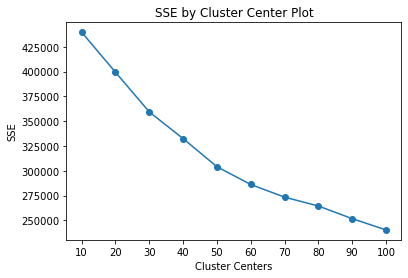

In [63]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

def find_optimal_clusters(data, max_k):
    iters = range(10, max_k+1, 10)
    
    sse = []
    for k in iters:
        kmeans_model = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=100, random_state=42, batch_size = 512)    
        kmeans_model.fit(data)
        val = kmeans_model.inertia_
        sse.append(val)
        #labels = kmeans_model.labels_
        #print(metrics.silhouette_score(data, labels, metric='euclidean'))
        print('Fit {} clusters. SSE {}'.format(k,val))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 100)

In [64]:
true_k = 50

model = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1, max_iter=100, random_state=42, batch_size = 512)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
val = model.inertia_
print('Fit {} clusters. SSE {}'.format(true_k,val))

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print


print("\n")
print("Prediction")

Top terms per cluster:
Fit 50 clusters. SSE 304052.8758748375
Cluster 0:
 input
 unresolved
 reference
 error
 kt
 nmain
 string
 println
 val
 type
Cluster 1:
 message
 io
 inline
 unit
 npublic
 kotlin
 fun
 defined
 println
 ambiguity
Cluster 2:
 level
 declaration
 expecting
 kt
 nmain
 error
 println
 nprintln
 main
 nfun
Cluster 3:
 value
 parameter
 passed
 error
 kt
 nmain
 val
 required
 type
 annotation
Cluster 4:
 char
 letter
 isdigit
 applied
 boolean
 operator
 nval
 reference
 unresolved
 isvowel
Cluster 5:
 unresolved
 reference
 error
 kt
 nmain
 println
 variable
 return
 int
 nprintln
Cluster 6:
 print
 unresolved
 reference
 error
 nmain
 kt
 expecting
 readline
 element
 line
Cluster 7:
 type
 inferred
 mismatch
 expected
 int
 string
 return
 boolean
 error
 kt
Cluster 8:
 error
 nmain
 kt
 line
 tokens
 unexpected
 separate
 expressions
 use
 reference
Cluster 9:
 println
 unresolved
 reference
 error
 nmain
 kt
 expecting
 invocation
 yes
 expected
Cluster 10:
 

In [ ]:
import pandas as pd
from sklearn import metrics

V = pd.unique(df_res['reason'])
len(V)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(min_df = 0.005,  stop_words ='english')
X = vectorizer.fit_transform(V)

vectorizer.get_feature_names()

In [490]:
# Kotlin
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(min_df = 0.005,  stop_words ='english')
X = vectorizer.fit_transform(V)

vectorizer.get_feature_names()

['abstract',
 'allowed',
 'applied',
 'argument',
 'arguments',
 'array',
 'boolean',
 'box',
 'char',
 'character',
 'characters',
 'class',
 'code',
 'component1',
 'component6',
 'conform',
 'const',
 'constructor',
 'corresponds',
 'declaration',
 'declared',
 'denote',
 'destructuring',
 'does',
 'dot',
 'double',
 'error',
 'expected',
 'expecting',
 'expression',
 'final',
 'floating',
 'fun',
 'function',
 'initializer',
 'inline',
 'int',
 'integer',
 'interface',
 'invocation',
 'invoke',
 'invoked',
 'kotlin',
 'label',
 'list',
 'literal',
 'local',
 'long',
 'loop',
 'map',
 'modifier',
 'mutablelist',
 'non',
 'null',
 'nullable',
 'open',
 'operator',
 'parameter',
 'parameters',
 'point',
 'println',
 'private',
 'property',
 'public',
 'qualified',
 'readline',
 'receiver',
 'return',
 'safe',
 'selector',
 'string',
 'type',
 'types',
 'unit',
 'value',
 'values',
 'variable']

In [491]:
X

<2602x77 sparse matrix of type '<class 'numpy.float64'>'
	with 9201 stored elements in Compressed Sparse Row format>

0.46037032916912074
Fit 10 clusters. SSE 1021.8861943668632
0.4879565644625842
Fit 15 clusters. SSE 830.275932382528
0.5403243448325018
Fit 20 clusters. SSE 696.8684476825258
0.585281293670369
Fit 25 clusters. SSE 586.4460924382876
0.6006221536180884
Fit 30 clusters. SSE 526.5588540699152
0.6072872839942981
Fit 35 clusters. SSE 491.00921703863224
0.6313211738948065
Fit 40 clusters. SSE 439.1150826943659
0.6490177358603145
Fit 45 clusters. SSE 378.67826304938245
0.649317731641244
Fit 50 clusters. SSE 362.9285156848322
0.6534745883170853
Fit 55 clusters. SSE 343.3649488480617
0.6622414239929297
Fit 60 clusters. SSE 318.4623755326294
0.6765265807210346
Fit 65 clusters. SSE 294.7911842095729
0.6839403727575298
Fit 70 clusters. SSE 270.5794177480002
0.6826644332703605
Fit 75 clusters. SSE 261.4287242967753
0.6874132412263104
Fit 80 clusters. SSE 252.45130067984377
0.6927223247595222
Fit 85 clusters. SSE 242.8532174701885
0.6990441690524535
Fit 90 clusters. SSE 233.2355532157481
0.7058049649

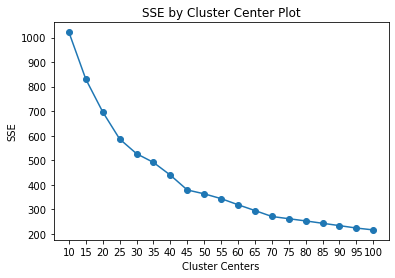

In [495]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

def find_optimal_clusters(data, max_k):
    iters = range(10, max_k+1, 5)
    
    sse = []
    for k in iters:
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=100, random_state=42)    
        kmeans_model.fit(data)
        val = kmeans_model.inertia_
        sse.append(val)
        labels = kmeans_model.labels_
        print(metrics.silhouette_score(data, labels, metric='euclidean'))
        print('Fit {} clusters. SSE {}'.format(k,val))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 100)

In [496]:
true_k = 45

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 parameter
 type
 variable
 const
 error
 int
 parameters
 interface
 types
 does
Cluster 1:
 invocation
 function
 expected
 int
 char
 list
 integer
 code
 error
 map
Cluster 2:
 fun
 public
 arguments
 operator
 int
 kotlin
 values
 mutablelist
 list
 string
Cluster 3:
 characters
 character
 literal
 string
 println
 kotlin
 readline
 fun
 denote
 destructuring
Cluster 4:
 long
 destructuring
 initializer
 declaration
 component6
 type
 function
 component1
 array
 list
Cluster 5:
 expecting
 declaration
 class
 parameter
 variable
 argument
 open
 expression
 type
 function
Cluster 6:
 safe
 return
 code
 kotlin
 list
 string
 values
 loop
 char
 value
Cluster 7:
 qualified
 corresponds
 dot
 operator
 map
 double
 array
 null
 readline
 list
Cluster 8:
 invoked
 expression
 int
 type
 function
 mutablelist
 array
 list
 string
 long
Cluster 9:
 constructor
 public
 arguments
 array
 return
 string
 variable
 expected
 denote
 destructuring
Cluste

In [497]:
str = ["unresolved reference"]
v = vectorizer.transform(str)
model.predict(v)

array([0])

In [498]:
df_res['reason_1'] = model.predict(vectorizer.transform(df_res['reason']))
df_res

,language,code,code_part,string,symbol,message,user_id,sub_id,client,reason,reason_1,reason_2,reason_message
0,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,13,"expecting an expression\n println(|Hello, W...",1724,27291,web,expecting an expression,5,10,expression expecting variable
1,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,13,"expecting an expression\n println(|Hello, W...",1724,27291,web,expecting an expression,5,10,expression expecting variable
2,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,19,"expecting an element\n println(|Hello, Worl...",1724,27291,web,expecting an element,5,15,element expecting variable
3,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,19,"expecting an element\n println(|Hello, Worl...",1724,27291,web,expecting an element,5,15,element expecting variable
4,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,5,overload resolution ambiguity: \npublic inline...,1724,27291,web,overload resolution ambiguity,0,5,ambiguity resolution overload
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032388,kotlin,class CountDownCounter(var count: Int) {\n ...,count--,4,6,unresolved reference: Synchronizied\n @Sync...,7480,28770248,web,unresolved reference,0,1,reference unresolved expected
1032389,kotlin,class CountDownCounter(var count: Int) {\n ...,count--,4,6,unresolved reference: synchronizied\n @sync...,7480,28770264,web,unresolved reference,0,1,reference unresolved expected
1032390,kotlin,class Account {\n\n var balance = 0L\n\n ...,Out of code,89,13,unresolved reference: balanc\n bala...,647,28556895,Idea,unresolved reference,0,1,reference unresolved expected
1032391,kotlin,class Account {\n\n var balance = 0L\n\n ...,Out of code,89,20,unresolved reference: -=\n balanc -...,647,28556895,Idea,unresolved reference,0,1,reference unresolved expected


In [499]:
df_res.groupby('reason_1')['message'].count().sort_values(ascending = False)

reason_1
0     531031
5     251945
32     65008
1      24964
15     17518
2      15429
35     14055
6      12989
21     12086
11     10616
19      9240
16      7606
42      6896
10      6378
41      5568
29      4885
18      4393
33      3852
3       3784
36      3170
9       2922
24      2645
17      1760
7       1722
40      1712
22      1577
14      1421
23      1314
30       900
43       892
20       684
39       601
34       585
28       559
37       424
31       303
13       252
38       160
44       153
25       112
4         89
8         72
26        61
27        31
12        29
Name: message, dtype: int64

In [501]:
pd.unique(df_res[df_res['reason_1']==0]['reason'])

array(['overload resolution ambiguity', 'unresolved reference',
       "unexpected tokens (use ';' to separate expressions on the same line)",
       'variable expected', 'variable must be initialized',
       'this variable must either have a type annotation or be initialized',
       'conflicting declarations', 'illegal underscore',
       'unclosed comment', 'parameter name expected',
       'a type annotation is required on a value parameter',
       'val cannot be reassigned',
       'unsupported [Collection literals outside of annotations]',
       'cannot infer a type for this parameter',
       'no value passed for parameter ',
       'not enough information to infer type variable T',
       'illegal escape', 'cannot find a parameter with this name',
       'names _, __, ___, ', 'assignment operators ambiguity',
       'classifier does not have a companion object, and thus must be initialized here',
       'type parameter name expected', "missing '>'",
       "not nullable valu

In [443]:
vectorizer = TfidfVectorizer(min_df = 0.01,  stop_words ='english')
X = vectorizer.fit_transform(df_res['reason'])

vectorizer.get_feature_names()

['allowed',
 'ambiguity',
 'arguments',
 'body',
 'called',
 'conflicting',
 'conform',
 'declaration',
 'declarations',
 'does',
 'element',
 'expected',
 'expecting',
 'expression',
 'expressions',
 'following',
 'fun',
 'function',
 'functions',
 'initialized',
 'inline',
 'integer',
 'invocation',
 'level',
 'line',
 'literal',
 'member',
 'mismatch',
 'operator',
 'overload',
 'parameter',
 'passed',
 'println',
 'property',
 'public',
 'reassigned',
 'reference',
 'required',
 'resolution',
 'safe',
 'separate',
 'supplied',
 'tokens',
 'type',
 'unexpected',
 'unresolved',
 'use',
 'val',
 'value',
 'variable']

In [444]:
def find_optimal_clusters(data, max_k):
    iters = range(10, max_k+1, 5)
    
    sse = []
    for k in iters:
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=100, random_state=42)    
        kmeans_model.fit(data)
        val = kmeans_model.inertia_
        sse.append(val)
        labels = kmeans_model.labels_
        print(metrics.silhouette_score(data, labels, metric='euclidean'))
        print('Fit {} clusters. SSE {}'.format(k,val))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 100)

0.6590192122943125
Fit 10 clusters. SSE 265669.2338393379


KeyboardInterrupt: 

In [502]:
true_k = 45

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 invoked
 expression
 type
 function
 int
 array
 mutablelist
 string
 list
 char
Cluster 1:
 qualified
 corresponds
 dot
 operator
 map
 double
 array
 null
 readline
 list
Cluster 2:
 invocation
 function
 expected
 int
 string
 char
 list
 integer
 mutablelist
 code
Cluster 3:
 characters
 character
 literal
 string
 println
 kotlin
 readline
 fun
 denote
 destructuring
Cluster 4:
 fun
 public
 arguments
 type
 expected
 operator
 array
 int
 box
 values
Cluster 5:
 conform
 does
 integer
 literal
 type
 expected
 character
 int
 string
 return
Cluster 6:
 safe
 return
 code
 list
 string
 values
 long
 loop
 char
 value
Cluster 7:
 string
 applied
 operator
 list
 array
 mutablelist
 map
 expected
 type
 invocation
Cluster 8:
 error
 box
 type
 arguments
 constructor
 expected
 long
 unit
 array
 return
Cluster 9:
 property
 class
 constructor
 type
 abstract
 open
 receiver
 expecting
 declaration
 string
Cluster 10:
 declaration
 destructuring
 i

In [65]:
classter_name = {}
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    name = ""
    for ind in order_centroids[i, :3]:
        name += terms[ind] + " "
    classter_name[i] = name.strip()    
classter_name   

{0: 'input unresolved reference',
 1: 'message io inline',
 2: 'level declaration expecting',
 3: 'value parameter passed',
 4: 'char letter isdigit',
 5: 'unresolved reference error',
 6: 'print unresolved reference',
 7: 'type inferred mismatch',
 8: 'error nmain kt',
 9: 'println unresolved reference',
 10: 'npublic kotlin collections',
 11: 'numbers level lastindex',
 12: 'dualboot os operatingsystem',
 13: 'println public arguments',
 14: 'number reference unresolved',
 15: 'val reference unresolved',
 16: 'tokens separate unexpected',
 17: 'final operator int',
 18: 'reference unresolved error',
 19: 'variable initialized box',
 20: 'str string reference',
 21: 'print message io',
 22: 'var declarations int',
 23: 'conform literal does',
 24: 'val declarations conflicting',
 25: 'asserted safe calls',
 26: 'text string charsequence',
 27: 'max value unresolved',
 28: 'point kt error',
 29: 'abs math error',
 30: 'price product int',
 31: 'typevariable collections operator',
 32: 

In [503]:
df_res['reason_2'] = model.predict(vectorizer.transform(df_res['reason']))
df_res

,language,code,code_part,string,symbol,message,user_id,sub_id,client,reason,reason_1,reason_2,reason_message
0,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,13,"expecting an expression\n println(|Hello, W...",1724,27291,web,expecting an expression,5,11,expression expecting variable
1,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,13,"expecting an expression\n println(|Hello, W...",1724,27291,web,expecting an expression,5,11,expression expecting variable
2,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,19,"expecting an element\n println(|Hello, Worl...",1724,27291,web,expecting an element,5,11,element expecting variable
3,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,19,"expecting an element\n println(|Hello, Worl...",1724,27291,web,expecting an element,5,11,element expecting variable
4,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,5,overload resolution ambiguity: \npublic inline...,1724,27291,web,overload resolution ambiguity,0,8,ambiguity resolution overload
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032388,kotlin,class CountDownCounter(var count: Int) {\n ...,count--,4,6,unresolved reference: Synchronizied\n @Sync...,7480,28770248,web,unresolved reference,0,8,reference unresolved expected
1032389,kotlin,class CountDownCounter(var count: Int) {\n ...,count--,4,6,unresolved reference: synchronizied\n @sync...,7480,28770264,web,unresolved reference,0,8,reference unresolved expected
1032390,kotlin,class Account {\n\n var balance = 0L\n\n ...,Out of code,89,13,unresolved reference: balanc\n bala...,647,28556895,Idea,unresolved reference,0,8,reference unresolved expected
1032391,kotlin,class Account {\n\n var balance = 0L\n\n ...,Out of code,89,20,unresolved reference: -=\n balanc -...,647,28556895,Idea,unresolved reference,0,8,reference unresolved expected


In [504]:
pd.unique(df_res[df_res['reason_2']==1]['reason'])

array(["operator call corresponds to a dot-qualified call 'a",
       "operator call corresponds to a dot-qualified call 'input?",
       "operator call corresponds to a dot-qualified call 'distance",
       "operator call corresponds to a dot-qualified call 'celsius",
       "operator call corresponds to a dot-qualified call 'num",
       "operator call corresponds to a dot-qualified call 'inputReeses",
       "operator call corresponds to a dot-qualified call 'cups",
       "operator call corresponds to a dot-qualified call 'number",
       "operator call corresponds to a dot-qualified call 'b",
       "operator call corresponds to a dot-qualified call 'c",
       "qualified name must be a '",
       "operator call corresponds to a dot-qualified call 'box1",
       "operator call corresponds to a dot-qualified call 'box2",
       "operator call corresponds to a dot-qualified call 'it",
       "operator call corresponds to a dot-qualified call 'u",
       "operator call corresponds to

In [505]:
pd.unique(df_res[df_res['reason_2']==2]['reason'])

array(["function invocation 'println' expected",
       "function invocation 'print' expected",
       'function must have a body', "function invocation 'TODO' expected",
       "function invocation 'repeat' expected",
       "function invocation 'trimIndent' expected",
       "function invocation 'toUpperCase' expected",
       "function invocation 'nextInt' expected",
       "function invocation 'nextLine' expected",
       "function invocation 'hasNext' expected",
       "function invocation 'listOf' expected",
       "function invocation 'next' expected",
       "function invocation 'Scanner' expected",
       "function invocation 'ArrayList<String>' expected",
       "function invocation 'toInt' expected",
       "function invocation 'toLong' expected",
       "function invocation 'toCharArray' expected",
       "function invocation 'toDouble' expected",
       "function invocation 'reversed' expected",
       "function invocation 'toBoolean' expected",
       "function invocation

In [506]:
pd.unique(df_res[df_res['reason_2']==4]['reason'])

array(['none of the following functions can be called with the arguments supplied',
       'too many arguments for public fun isVowel',
       'too many arguments for public fun isGreater',
       'too many arguments for public fun square',
       'too many arguments for public fun IntArray',
       'too many arguments for public fun isEven',
       'too many arguments for public fun compose',
       'too many arguments for public fun parseCardNumber {',
       'too many arguments for public fun parseCardNumber',
       'too many arguments for public fun totalPrice',
       'too many arguments for public fun url',
       'too many arguments for public fun main {count++}',
       'too many arguments for public fun generateTemperature',
       'too many arguments for public fun Random',
       'too many arguments for public fun calculate {',
       'too many arguments for public fun length',
       'too many arguments for public fun sum',
       'too many arguments for public fun divide'

In [507]:
pd.unique(df_res[df_res['reason_2']==40]['reason'])

array(['incompatible types', 'expected parameters of types Int, Int',
       'parameters must have type annotation',
       'expected parameters of types Long, Long',
       'expected parameters of types Int, String',
       'expected parameters of types Int, Nothing',
       'expected parameters of types Int, ???, String',
       'expected parameters of types [ERROR ',
       'expected parameters of types Pair<Int, Boolean>, Int',
       'type parameters must be placed before the name of the function',
       'expected parameters of types ???, ???, ???',
       'enum types cannot be instantiated',
       'expected parameters of types Int, Int, Int',
       'expected parameters of types String, Int',
       'expected parameters of types Map<Int, Int>, Int',
       'expected parameters of types Pair<Boolean, MutableList<Int>>, Char',
       'only type parameters of inline functions can be reified'],
      dtype=object)

In [508]:
classter_name = {}
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    name = ""
    for ind in order_centroids[i, :3]:
        name += terms[ind] + " "
    classter_name[i] = name.strip()    
classter_name   

{0: 'invoked expression type',
 1: 'qualified corresponds dot',
 2: 'invocation function expected',
 3: 'characters character literal',
 4: 'fun public arguments',
 5: 'conform does integer',
 6: 'safe return code',
 7: 'string applied operator',
 8: 'error box type',
 9: 'property class constructor',
 10: 'declaration destructuring initializer',
 11: 'expecting class declaration',
 12: 'private constructor arguments',
 13: 'open fun public',
 14: 'constructor arguments public',
 15: 'println inline fun',
 16: 'invoke abstract fun',
 17: 'selector expression code',
 18: 'local final fun',
 19: 'expression function receiver',
 20: 'int applied operator',
 21: 'return value type',
 22: 'boolean conform does',
 23: 'final fun public',
 24: 'parameter type expected',
 25: 'class type arguments',
 26: 'label denote loop',
 27: 'type non expected',
 28: 'floating point conform',
 29: 'variable type expecting',
 30: 'abstract fun public',
 31: 'null non value',
 32: 'values declared loop',
 3

In [43]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = vectorizer = TfidfVectorizer(min_df = 0.005,  stop_words ='english', token_pattern= r'([a-zA-Z-/.]{2,})', ngram_range = {1,3})
X = vectorizer.fit_transform(df_res['reason'])

vectorizer.get_feature_names()

['access',
 'applied',
 'applied given',
 'applied given types',
 'array',
 'array required',
 'bad',
 'bad operand',
 'bad operand types',
 'binary',
 'binary operator',
 'character',
 'character literal',
 'class',
 'class interface',
 'class interface enum',
 'constructor',
 'context',
 'declaration',
 'declaration return',
 'declaration return type',
 'declared',
 'declared file',
 'declared file named',
 'defined',
 'defined method',
 'defined method main',
 'dereferenced',
 'does',
 'does exist',
 'end',
 'end file',
 'end file parsing',
 'enum',
 'enum expected',
 'enum record',
 'enum record expected',
 'exist',
 'expected',
 'expression',
 'file',
 'file named',
 'file parsing',
 'given',
 'given types',
 'identifier',
 'identifier expected',
 'illegal',
 'illegal character',
 'illegal start',
 'illegal start expression',
 'illegal start type',
 'incompatible',
 'incompatible types',
 'initialized',
 'int',
 'interface',
 'interface enum',
 'interface enum expected',
 'interfa

Fit 10 clusters. SSE 424110.6622922276
Fit 15 clusters. SSE 278743.66881242767
Fit 20 clusters. SSE 181710.37291397084
Fit 25 clusters. SSE 125412.68832613947
Fit 30 clusters. SSE 87067.91020906645
Fit 35 clusters. SSE 50896.36364634273
Fit 40 clusters. SSE 40211.97888904942
Fit 45 clusters. SSE 30247.75029019334
Fit 50 clusters. SSE 54424.78526173789
Fit 55 clusters. SSE 52823.87965657702
Fit 60 clusters. SSE 59685.641275266375
Fit 65 clusters. SSE 61229.63776981157
Fit 70 clusters. SSE 58944.61164261466
Fit 75 clusters. SSE 63439.32656930067
Fit 80 clusters. SSE 55875.71678412345
Fit 85 clusters. SSE 58333.15742561381
Fit 90 clusters. SSE 50814.617391063664
Fit 95 clusters. SSE 50469.846136331114
Fit 100 clusters. SSE 43756.96304753007


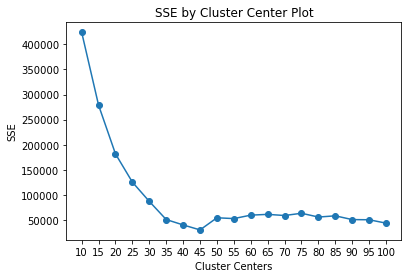

In [44]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

def find_optimal_clusters(data, max_k):
    iters = range(10, max_k+1, 5)
    
    sse = []
    for k in iters:
        kmeans_model = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=100, random_state=42, batch_size = 512)    
        kmeans_model.fit(data)
        val = kmeans_model.inertia_
        sse.append(val)
        #labels = kmeans_model.labels_
        #print(metrics.silhouette_score(data, labels, metric='euclidean'))
        print('Fit {} clusters. SSE {}'.format(k,val))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 100)

In [45]:
true_k = 44

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 expected
 interface
 enum
 expression
 variable initialized
 identifier
 end file parsing
 enum expected
 enum record
 enum record expected
Cluster 1:
 symbol
 variable initialized
 identifier
 end file parsing
 enum
 enum expected
 enum record
 enum record expected
 exist
 expected
Cluster 2:
 given types
 applied
 applied given
 applied given types
 given
 method
 types
 class
 main
 interface
Cluster 3:
 illegal start type
 start type
 type
 illegal start
 start
 illegal
 file parsing
 file
 expression
 variable initialized
Cluster 4:
 incompatible
 incompatible types
 types
 expression
 file parsing
 file named
 file
 expected
 variable initialized
 given types
Cluster 5:
 statement
 unexpected
 expression
 expected
 variable initialized
 given types
 end file parsing
 enum
 enum expected
 enum record
Cluster 6:
 enum
 static
 bad
 declaration
 expression
 required
 variable
 interface
 referenced
 invalid
Cluster 7:
 identifier
 identifier expect

In [46]:
classter_name = {}
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    name = ""
    for ind in order_centroids[i, :3]:
        name += terms[ind] + " "
    classter_name[i] = name.strip()    
classter_name   

{0: 'expected interface enum',
 1: 'symbol variable initialized identifier',
 2: 'given types applied applied given',
 3: 'illegal start type start type type',
 4: 'incompatible incompatible types types',
 5: 'statement unexpected expression',
 6: 'enum static bad',
 7: 'identifier identifier expected expected',
 8: 'defined defined method variable',
 9: 'start expression illegal start expression expression',
 10: 'illegal character character illegal',
 11: 'enum expected interface enum expected class interface enum',
 12: 'binary operator operand types operand types binary',
 13: 'missing return statement return statement missing return',
 14: 'end file end file parsing reached end file',
 15: 'unclosed character literal unclosed character character literal',
 16: 'initialized variable array',
 17: 'exist does exist package',
 18: 'type expression does',
 19: 'non-static method non-static method',
 20: 'interface enum record enum record expected record expected',
 21: 'unexpected unex

In [47]:
df_res['class'] = model.predict(vectorizer.transform(df_res['reason']))
df_res

,language,code,code_part,string,message,user_id,sub_id,client,reason,class
0,java11,import sun.tools.jstat.Scale;\nimport java.uti...,import sun.tools.jstat.Scale;,1,package sun.tools.jstat is not visible\nimport...,3049,10071,Idea,package sun,40
1,java11,import java.util.Scanner;\nclass Main {\n p...,"} System.out.println(array[i][j] + "" "");",16,cannot find symbol\n } System.out.print...,3161,20814,web,cannot find symbol,1
2,java11,import java.util.Scanner;\nclass Main {\n p...,"} System.out.println(array[i][j] + "" "");",16,cannot find symbol\n } System.out.print...,3161,20814,web,cannot find symbol,1
3,java11,import java.util.Scanner;\nclass Main {\n p...,"array[i][j] = array[i][j] + "" "";",14,incompatible types: String cannot be converted...,3161,20872,web,incompatible types,4
4,java11,import java.util.Scanner;\nclass Main {\n p...,System.out.println(Arrays.toString...,14,cannot find symbol\n System.out.pri...,3375,24023,web,cannot find symbol,1
...,...,...,...,...,...,...,...,...,...,...
1934593,java17,import java.util.Scanner;\nimport java.lang.En...,case 3 -> month.March;,14,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types,4
1934594,java17,import java.util.Scanner;\nimport java.lang.En...,case 4 -> month.April;,15,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types,4
1934595,java17,import java.util.Scanner;\nimport java.lang.En...,case 5 -> month.May;,16,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types,4
1934596,java17,import java.util.Scanner;\nimport java.lang.En...,case 6 -> month.June;,17,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types,4


In [48]:
df_res['class_message'] = df_res['class'].map(lambda x: classter_name[x])
df_res

,language,code,code_part,string,message,user_id,sub_id,client,reason,class,class_message
0,java11,import sun.tools.jstat.Scale;\nimport java.uti...,import sun.tools.jstat.Scale;,1,package sun.tools.jstat is not visible\nimport...,3049,10071,Idea,package sun,40,package defined class
1,java11,import java.util.Scanner;\nclass Main {\n p...,"} System.out.println(array[i][j] + "" "");",16,cannot find symbol\n } System.out.print...,3161,20814,web,cannot find symbol,1,symbol variable initialized identifier
2,java11,import java.util.Scanner;\nclass Main {\n p...,"} System.out.println(array[i][j] + "" "");",16,cannot find symbol\n } System.out.print...,3161,20814,web,cannot find symbol,1,symbol variable initialized identifier
3,java11,import java.util.Scanner;\nclass Main {\n p...,"array[i][j] = array[i][j] + "" "";",14,incompatible types: String cannot be converted...,3161,20872,web,incompatible types,4,incompatible incompatible types types
4,java11,import java.util.Scanner;\nclass Main {\n p...,System.out.println(Arrays.toString...,14,cannot find symbol\n System.out.pri...,3375,24023,web,cannot find symbol,1,symbol variable initialized identifier
...,...,...,...,...,...,...,...,...,...,...,...
1934593,java17,import java.util.Scanner;\nimport java.lang.En...,case 3 -> month.March;,14,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types,4,incompatible incompatible types types
1934594,java17,import java.util.Scanner;\nimport java.lang.En...,case 4 -> month.April;,15,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types,4,incompatible incompatible types types
1934595,java17,import java.util.Scanner;\nimport java.lang.En...,case 5 -> month.May;,16,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types,4,incompatible incompatible types types
1934596,java17,import java.util.Scanner;\nimport java.lang.En...,case 6 -> month.June;,17,incompatible types: bad type in switch express...,25380,32315380,web,incompatible types,4,incompatible incompatible types types


In [509]:
df_res['reason_message'] = df_res['reason_2'].map(lambda x: classter_name[x])
df_res

,language,code,code_part,string,symbol,message,user_id,sub_id,client,reason,reason_1,reason_2,reason_message
0,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,13,"expecting an expression\n println(|Hello, W...",1724,27291,web,expecting an expression,5,11,expecting class declaration
1,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,13,"expecting an expression\n println(|Hello, W...",1724,27291,web,expecting an expression,5,11,expecting class declaration
2,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,19,"expecting an element\n println(|Hello, Worl...",1724,27291,web,expecting an element,5,11,expecting class declaration
3,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,19,"expecting an element\n println(|Hello, Worl...",1724,27291,web,expecting an element,5,11,expecting class declaration
4,kotlin,"fun main() {\n println(|Hello, World!)\n}\n","println(|Hello, World!)",2,5,overload resolution ambiguity: \npublic inline...,1724,27291,web,overload resolution ambiguity,0,8,error box type
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032388,kotlin,class CountDownCounter(var count: Int) {\n ...,count--,4,6,unresolved reference: Synchronizied\n @Sync...,7480,28770248,web,unresolved reference,0,8,error box type
1032389,kotlin,class CountDownCounter(var count: Int) {\n ...,count--,4,6,unresolved reference: synchronizied\n @sync...,7480,28770264,web,unresolved reference,0,8,error box type
1032390,kotlin,class Account {\n\n var balance = 0L\n\n ...,Out of code,89,13,unresolved reference: balanc\n bala...,647,28556895,Idea,unresolved reference,0,8,error box type
1032391,kotlin,class Account {\n\n var balance = 0L\n\n ...,Out of code,89,20,unresolved reference: -=\n balanc -...,647,28556895,Idea,unresolved reference,0,8,error box type


In [510]:
df_res.groupby('reason_2')['message'].count().sort_values(ascending = False)

reason_2
8     471018
11    250987
27     66618
29     28588
24     26276
2      25352
19     17521
4      15477
15     14083
6      12984
42     12026
9      10611
5       9555
39      9013
40      8683
10      6985
22      6378
33      5568
41      4885
0       4476
14      4245
3       3784
17      2645
1       1722
23      1713
13      1577
26      1421
25      1319
21      1314
35       893
12       746
28       601
34       597
38       585
30       482
7        465
44       316
31       252
20       236
16       112
37        81
32        61
18        61
43        46
36        35
Name: message, dtype: int64

In [7]:
df_styles = df[df['solution_label'] == 'Style']
df_styles

,step_id,status,client,uid_anon,id_anon,reply,feedback,solution_label
14,1926,2,web,2995,35101,"{""language"": ""java11"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
23,1926,2,web,3967,79655,"{""language"": ""java11"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
25,1926,2,web,3924,86667,"{""language"": ""java11"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
26,1926,2,web,3924,86733,"{""language"": ""java11"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
27,1926,2,web,3924,86856,"{""language"": ""java11"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
...,...,...,...,...,...,...,...,...
3633899,18479,2,web,789,31345823,"{""language"": ""java17"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
3633900,18479,2,idea,1893,31406337,"{""choices"": null, ""score"": """", ""solution"": nul...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
3633903,18479,2,web,687,31462175,"{""language"": ""java17"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style
3633904,18479,2,web,687,31462201,"{""language"": ""java17"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style


In [8]:
def style_quality(row):
    json_data = json.loads(row['feedback'],strict=False)
    try:
        return json_data['code_style']['quality']['code']
    except:
        return "UND"


df_styles['quality'] = df_styles.apply(lambda row: style_quality(row), axis=1)
df_styles

,step_id,status,client,uid_anon,id_anon,reply,feedback,solution_label,quality
14,1926,2,web,2995,35101,"{""language"": ""java11"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style,BAD
23,1926,2,web,3967,79655,"{""language"": ""java11"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style,BAD
25,1926,2,web,3924,86667,"{""language"": ""java11"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style,BAD
26,1926,2,web,3924,86733,"{""language"": ""java11"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style,BAD
27,1926,2,web,3924,86856,"{""language"": ""java11"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style,BAD
...,...,...,...,...,...,...,...,...,...
3633899,18479,2,web,789,31345823,"{""language"": ""java17"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style,EXCELLENT
3633900,18479,2,idea,1893,31406337,"{""choices"": null, ""score"": """", ""solution"": nul...","{""message"": """", ""code_style"": {""quality"": {""co...",Style,EXCELLENT
3633903,18479,2,web,687,31462175,"{""language"": ""java17"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style,EXCELLENT
3633904,18479,2,web,687,31462201,"{""language"": ""java17"", ""code"": ""import java.ut...","{""message"": """", ""code_style"": {""quality"": {""co...",Style,EXCELLENT


In [9]:
df_styles.groupby('quality')['id_anon'].count().sort_values(ascending = False)

quality
GOOD         421533
EXCELLENT    178015
BAD          172320
MODERATE      92768
Name: id_anon, dtype: int64

In [10]:
res_list = []
def style_place(row):
    list = []
    json_data = json.loads(row['feedback'],strict=False)
    for i in json_data['code_style']['errors']:
        d = {}
        reply_data = json.loads(row['reply'],strict=False)
        d['user_id'] = row['uid_anon']
        d['sub_id'] = row['id_anon']
        d['language'] = reply_data['language']
        d['code'] = reply_data['code']
        d['quality'] =  row['quality']
        d['type'] = i['code']
        d['text'] = i['text']
        d['code_part'] = i['line']
        d['string'] = i['line_number']            
        d['symbol'] = i['column_number']
        try:
            d['difficulty'] = i['difficulty']
        except:
            d['difficulty'] = ""
        list.append(d)
        res_list.append(d)
    return list


df_styles['data'] =df_styles.apply(lambda row: style_place(row), axis=1)
df_styles['data']

14         [{'user_id': 2995, 'sub_id': 35101, 'language'...
23         [{'user_id': 3967, 'sub_id': 79655, 'language'...
25         [{'user_id': 3924, 'sub_id': 86667, 'language'...
26         [{'user_id': 3924, 'sub_id': 86733, 'language'...
27         [{'user_id': 3924, 'sub_id': 86856, 'language'...
                                 ...                        
3633899    [{'user_id': 789, 'sub_id': 31345823, 'languag...
3633900    [{'user_id': 1893, 'sub_id': 31406337, 'langua...
3633903    [{'user_id': 687, 'sub_id': 31462175, 'languag...
3633904    [{'user_id': 687, 'sub_id': 31462201, 'languag...
3633905    [{'user_id': 33656, 'sub_id': 32166663, 'langu...
Name: data, Length: 864636, dtype: object

In [11]:
df_style = pd.DataFrame(res_list)
df_style

,user_id,sub_id,language,code,quality,type,text,code_part,string,symbol,difficulty
0,2995,35101,java11,import java.util.Scanner;\n\n\n\npublic class ...,BAD,WhitespaceAroundCheck,'{' is not preceded with whitespace.,public class Main{,4,17,
1,2995,35101,java11,import java.util.Scanner;\n\n\n\npublic class ...,BAD,IndentationCheck,'method def modifier' has incorrect indentatio...,public static void main(String[] args){,6,0,
2,2995,35101,java11,import java.util.Scanner;\n\n\n\npublic class ...,BAD,WhitespaceAroundCheck,'{' is not preceded with whitespace.,public static void main(String[] args){,6,47,
3,2995,35101,java11,import java.util.Scanner;\n\n\n\npublic class ...,BAD,IndentationCheck,'method def' child has incorrect indentation l...,Scanner scan = new Scanner(System.in);,7,0,
4,2995,35101,java11,import java.util.Scanner;\n\n\n\npublic class ...,BAD,IndentationCheck,'method def' child has incorrect indentation l...,var n = scan.nextInt();,8,0,
...,...,...,...,...,...,...,...,...,...,...,...
3454680,789,31345823,java17,import java.util.Scanner;\nimport java.util.Ma...,EXCELLENT,MagicNumberCheck,Found a magic number. The use of unnamed magic...,Thread.sleep(100);,17,21,EASY
3454681,1893,31406337,java17,import java.util.Scanner;\nimport java.util.Ma...,EXCELLENT,MagicNumberCheck,Found a magic number. The use of unnamed magic...,Thread.sleep(500);,16,21,EASY
3454682,687,31462175,java17,import java.util.Scanner;\nimport java.util.Ma...,EXCELLENT,MagicNumberCheck,Found a magic number. The use of unnamed magic...,Thread.sleep(250);,17,21,EASY
3454683,687,31462201,java17,import java.util.Scanner;\nimport java.util.Ma...,EXCELLENT,MagicNumberCheck,Found a magic number. The use of unnamed magic...,Thread.sleep(250);,17,21,EASY


In [12]:
df_style.groupby('text')['sub_id'].count().sort_values(ascending = False)

text
Found a magic number. The use of unnamed magic numbers in code hides the developers' intent in choosing that number, increases opportunities for subtle errors and makes it more difficult for the program to be adapted and extended in the future.\nHowever, for small programs it can be allowed, but it is better to use constants instead of magic numbers.    389337
'{' is not preceded with whitespace.                                                                                                                                                                                                                                                                                                                                213059
'CLASS_DEF' should be separated from previous line.                                                                                                                                                                                                                          

In [13]:
def clean(s):
    s1 = re.sub("\'\\b[^']*\\b\'","",s)
    s1 = re.sub("\\([^']*\\)","",s1)
    s1 = re.sub("\\b[0-9][0-9.,-_]*\\b", '', s1)
    s1 = re.sub (r' +', ' ',s1)
    find = re.compile(r"^[^.\\:]*")
    return re.search(find, s1).group(0)

In [14]:
df_style['message'] = df_style['text'].map(lambda x: clean(x))
df_style

,user_id,sub_id,language,code,quality,type,text,code_part,string,symbol,difficulty,message
0,2995,35101,java11,import java.util.Scanner;\n\n\n\npublic class ...,BAD,WhitespaceAroundCheck,'{' is not preceded with whitespace.,public class Main{,4,17,,'{' is not preceded with whitespace
1,2995,35101,java11,import java.util.Scanner;\n\n\n\npublic class ...,BAD,IndentationCheck,'method def modifier' has incorrect indentatio...,public static void main(String[] args){,6,0,,"has incorrect indentation level , expected le..."
2,2995,35101,java11,import java.util.Scanner;\n\n\n\npublic class ...,BAD,WhitespaceAroundCheck,'{' is not preceded with whitespace.,public static void main(String[] args){,6,47,,'{' is not preceded with whitespace
3,2995,35101,java11,import java.util.Scanner;\n\n\n\npublic class ...,BAD,IndentationCheck,'method def' child has incorrect indentation l...,Scanner scan = new Scanner(System.in);,7,0,,"child has incorrect indentation level , expec..."
4,2995,35101,java11,import java.util.Scanner;\n\n\n\npublic class ...,BAD,IndentationCheck,'method def' child has incorrect indentation l...,var n = scan.nextInt();,8,0,,"child has incorrect indentation level , expec..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3454680,789,31345823,java17,import java.util.Scanner;\nimport java.util.Ma...,EXCELLENT,MagicNumberCheck,Found a magic number. The use of unnamed magic...,Thread.sleep(100);,17,21,EASY,Found a magic number
3454681,1893,31406337,java17,import java.util.Scanner;\nimport java.util.Ma...,EXCELLENT,MagicNumberCheck,Found a magic number. The use of unnamed magic...,Thread.sleep(500);,16,21,EASY,Found a magic number
3454682,687,31462175,java17,import java.util.Scanner;\nimport java.util.Ma...,EXCELLENT,MagicNumberCheck,Found a magic number. The use of unnamed magic...,Thread.sleep(250);,17,21,EASY,Found a magic number
3454683,687,31462201,java17,import java.util.Scanner;\nimport java.util.Ma...,EXCELLENT,MagicNumberCheck,Found a magic number. The use of unnamed magic...,Thread.sleep(250);,17,21,EASY,Found a magic number


In [15]:
df_style.groupby('message')['sub_id'].count().sort_values(ascending = False)

message
Found a magic number                                                     389337
 child has incorrect indentation level , expected level should be        365542
 has incorrect indentation level , expected level should be              229944
'{' is not preceded with whitespace                                      213059
 is not followed by whitespace                                           175863
                                                                          ...  
Avoid unused private methods such as 'initArray'                              1
Avoid unused private methods such as 'input'                                  1
Avoid unused private methods such as 'isAnagramsArray'                        1
The String "Dave1" appears times in the file                                  1
Name '$Hotel' must use camelCase (checked pattern '[a-z][a-zA-Z0-]*')         1
Name: sub_id, Length: 1116, dtype: int64

In [16]:
vectorizer = TfidfVectorizer(min_df = 5,  stop_words ='english')
X = vectorizer.fit_transform(pd.unique(df_style['message']))

vectorizer.get_feature_names()

NameError: name 'TfidfVectorizer' is not defined

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(min_df = 0.005,  stop_words ='english')
X = vectorizer.fit_transform(df_style['message'])

vectorizer.get_feature_names()

['array',
 'assignment',
 'avoid',
 'block',
 'break',
 'camelcase',
 'checked',
 'child',
 'column',
 'comment',
 'construct',
 'constructor',
 'declaration',
 'digit',
 'equals',
 'expected',
 'expression',
 'followed',
 'foreach',
 'import',
 'incorrect',
 'indentation',
 'java',
 'letter',
 'level',
 'line',
 'literal',
 'local',
 'long',
 'loop',
 'lowercase',
 'magic',
 'multi',
 'number',
 'parentheses',
 'pattern',
 'preceded',
 'previous',
 'replaced',
 'returning',
 'separate',
 'separated',
 'start',
 'statement',
 'string',
 'switch',
 'underscore',
 'unnecessary',
 'unused',
 'use',
 'useless',
 'variable',
 'variables',
 'whitespace',
 'z0',
 'za']

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

def find_optimal_clusters(data, max_k):
    iters = range(10, max_k, 3)
    
    sse = []
    for k in iters:
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=100, random_state=42)    
        kmeans_model.fit(data)
        val = kmeans_model.inertia_
        sse.append(val)
        #labels = kmeans_model.labels_
        #print(metrics.silhouette_score(data, labels, metric='euclidean'))
        print('Fit {} clusters. SSE {}'.format(k,val))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 55)

In [128]:
true_k = 26

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 expression contains magic
 expression contains
 contains magic
 contains magic number
 magic number
 magic
 number
 contains
 expression
 variable val
Cluster 1:
 missing spacing
 spacing
 missing
 variable val
 line detected
 functionality holds data
 holds
 holds data
 increase
 increase readability
Cluster 2:
 indentation
 unexpected indentation
 unexpected
 variable val
 line detected
 functionality holds
 functionality holds data
 holds
 holds data
 increase
Cluster 3:
 missing space
 missing space //
 space //
 //
 space
 missing
 line
 functionality holds data
 holds
 holds data
Cluster 4:
 variable val
 val
 variable
 line detected
 functionality holds
 functionality holds data
 holds
 holds data
 increase
 increase readability
Cluster 5:
 unexpected spacing
 unexpected
 spacing
 variable val
 line detected
 functionality holds
 functionality holds data
 holds
 holds data
 increase
Cluster 6:
 unnecessary replaced
 replaced
 parentheses unnece

In [129]:
df_style['reason'] = model.predict(vectorizer.transform(df_style['message']))
df_style

,user_id,sub_id,language,code,quality,type,text,code_part,string,symbol,difficulty,message,reason,reason_3
0,3571,160182,kotlin,"fun main() {\n println(""Hello, World!"")\n}",GOOD,Indentation,Unexpected indentation (3) (it should be 4),fun main() {,0,12,,Unexpected indentation,2,2
1,3581,193594,kotlin,"fun main() {\n val text = ""Hello, World!""\...",MODERATE,Indentation,Unexpected indentation (5) (it should be 4),fun main() {,0,12,,Unexpected indentation,2,2
2,3581,193594,kotlin,"fun main() {\n val text = ""Hello, World!""\...",MODERATE,Indentation,Unexpected indentation (5) (it should be 4),"val text = ""Hello, World!""",1,31,,Unexpected indentation,2,2
3,3581,193659,kotlin,"fun main() {\n val text = ""Hello, World!""\...",MODERATE,Indentation,Unexpected indentation (5) (it should be 4),fun main() {,0,12,,Unexpected indentation,2,2
4,3581,193659,kotlin,"fun main() {\n val text = ""Hello, World!""\...",MODERATE,Indentation,Unexpected indentation (5) (it should be 4),"val text = ""Hello, World!""",1,31,,Unexpected indentation,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976534,7805,29085194,kotlin,class Account {\n\n var balance = 0L\n\n ...,BAD,Indentation,Unexpected indentation (13) (should be 12),return false,8,0,EASY,Unexpected indentation,2,2
976535,7805,29085194,kotlin,class Account {\n\n var balance = 0L\n\n ...,BAD,Indentation,Unexpected indentation (9) (should be 8),} else {,9,0,EASY,Unexpected indentation,2,2
976536,7805,29085194,kotlin,class Account {\n\n var balance = 0L\n\n ...,BAD,Indentation,Unexpected indentation (13) (should be 12),balance -= amount,10,0,EASY,Unexpected indentation,2,2
976537,7805,29085194,kotlin,class Account {\n\n var balance = 0L\n\n ...,BAD,Indentation,Unexpected indentation (13) (should be 12),return true,11,0,EASY,Unexpected indentation,2,2


In [130]:
df_style.groupby('reason')['message'].count().sort_values(ascending = False)

reason
1     228017
0     210831
2     186308
5      49498
4      39268
6      37268
3      28656
8      19949
9      18393
13     18050
7      17216
10     17123
14     14058
12     12664
11     12373
17     11409
15     11341
18      9083
20      9004
16      5993
21      5778
22      4438
23      3871
19      3418
24      1309
25      1223
Name: message, dtype: int64

In [19]:
vectorizer = TfidfVectorizer(min_df = 0.005,  stop_words ='english', token_pattern= r'([a-zA-Z-/.]{2,})', ngram_range = {1,3})
X = vectorizer.fit_transform(df_style['message'])

vectorizer.get_feature_names()

['a-z',
 'a-z a-za-z',
 'a-za-z',
 'array',
 'assignment',
 'avoid',
 'avoid unused',
 'avoid unused local',
 'break',
 'camelcase',
 'camelcase checked',
 'camelcase checked pattern',
 'checked',
 'checked pattern',
 'checked pattern a-z',
 'child',
 'child incorrect',
 'child incorrect indentation',
 'column',
 'column line',
 'column line multi-block',
 'column previous',
 'column previous line',
 'comment',
 'comment incorrect',
 'comment incorrect indentation',
 'construct',
 'construct use',
 'declaration',
 'declaration statement',
 'digit',
 'digit underscore',
 'equals',
 'expected',
 'expected indentation',
 'expected indentation level',
 'expected level',
 'expression',
 'followed',
 'followed whitespace',
 'foreach',
 'foreach loop',
 'import',
 'import java',
 'incorrect',
 'incorrect indentation',
 'incorrect indentation level',
 'indentation',
 'indentation level',
 'indentation level expected',
 'indentation level line',
 'java',
 'letter',
 'letter use',
 'letter use c

Fit 10 clusters. SSE 625944.5090267197
Fit 14 clusters. SSE 442448.7773125479
Fit 18 clusters. SSE 314894.65140165505
Fit 22 clusters. SSE 235895.9154528029
Fit 26 clusters. SSE 137793.23513703406
Fit 30 clusters. SSE 88375.127842335
Fit 34 clusters. SSE 54791.75209994524
Fit 38 clusters. SSE 38133.69025658671
Fit 42 clusters. SSE 31236.08158054384
Fit 46 clusters. SSE 55285.95139433805
Fit 50 clusters. SSE 51770.251626102894
Fit 54 clusters. SSE 50807.61515375332
Fit 58 clusters. SSE 49978.092413631355


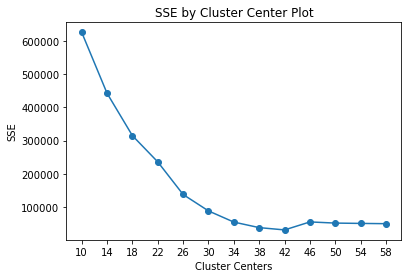

In [21]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

def find_optimal_clusters(data, max_k):
    iters = range(10, max_k, 4)
    
    sse = []
    for k in iters:
        kmeans_model = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=100, random_state=42, batch_size = 512)    
        kmeans_model.fit(data)
        val = kmeans_model.inertia_
        sse.append(val)
        #labels = kmeans_model.labels_
        #print(metrics.silhouette_score(data, labels, metric='euclidean'))
        print('Fit {} clusters. SSE {}'.format(k,val))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 60)

In [22]:
true_k = 42

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Top terms per cluster:
Cluster 0:
 unused local
 avoid unused local
 local variables
 unused local variables
 variables
 avoid unused
 local
 avoid
 unused
 followed
Cluster 1:
 preceded whitespace
 preceded
 whitespace
 incorrect
 expected
 expected indentation
 expected indentation level
 expected level
 expression
 followed
Cluster 2:
 level
 child
 child incorrect indentation
 child incorrect
 expected level
 level expected level
 indentation level expected
 incorrect indentation
 incorrect indentation level
 indentation
Cluster 3:
 followed
 followed whitespace
 whitespace
 incorrect indentation
 equals
 expected
 expected indentation
 expected indentation level
 expected level
 expression
Cluster 4:
 magic number
 magic
 number
 foreach
 incorrect
 import java
 import
 foreach loop
 whitespace
 incorrect indentation
Cluster 5:
 separated previous line
 separated
 separated previous
 previous line
 previous
 line
 letter use
 letter
 level expected indentation
 digit underscore
Cl

In [133]:
df_style['reason_3'] = model.predict(vectorizer.transform(df_style['message']))
df_style

,user_id,sub_id,language,code,quality,type,text,code_part,string,symbol,difficulty,message,reason,reason_3
0,3571,160182,kotlin,"fun main() {\n println(""Hello, World!"")\n}",GOOD,Indentation,Unexpected indentation (3) (it should be 4),fun main() {,0,12,,Unexpected indentation,2,0
1,3581,193594,kotlin,"fun main() {\n val text = ""Hello, World!""\...",MODERATE,Indentation,Unexpected indentation (5) (it should be 4),fun main() {,0,12,,Unexpected indentation,2,0
2,3581,193594,kotlin,"fun main() {\n val text = ""Hello, World!""\...",MODERATE,Indentation,Unexpected indentation (5) (it should be 4),"val text = ""Hello, World!""",1,31,,Unexpected indentation,2,0
3,3581,193659,kotlin,"fun main() {\n val text = ""Hello, World!""\...",MODERATE,Indentation,Unexpected indentation (5) (it should be 4),fun main() {,0,12,,Unexpected indentation,2,0
4,3581,193659,kotlin,"fun main() {\n val text = ""Hello, World!""\...",MODERATE,Indentation,Unexpected indentation (5) (it should be 4),"val text = ""Hello, World!""",1,31,,Unexpected indentation,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976534,7805,29085194,kotlin,class Account {\n\n var balance = 0L\n\n ...,BAD,Indentation,Unexpected indentation (13) (should be 12),return false,8,0,EASY,Unexpected indentation,2,0
976535,7805,29085194,kotlin,class Account {\n\n var balance = 0L\n\n ...,BAD,Indentation,Unexpected indentation (9) (should be 8),} else {,9,0,EASY,Unexpected indentation,2,0
976536,7805,29085194,kotlin,class Account {\n\n var balance = 0L\n\n ...,BAD,Indentation,Unexpected indentation (13) (should be 12),balance -= amount,10,0,EASY,Unexpected indentation,2,0
976537,7805,29085194,kotlin,class Account {\n\n var balance = 0L\n\n ...,BAD,Indentation,Unexpected indentation (13) (should be 12),return true,11,0,EASY,Unexpected indentation,2,0


In [138]:
r = df_style.groupby('reason_3')['message'].count().sort_values(ascending = False)
r

reason_3
1     228017
2     210831
0     186308
5      49498
4      39268
3      37268
9      28656
10     19949
7      18393
11     18050
14     17216
6      15668
8      14058
12     12664
15     12373
19     11409
16     11341
13      9083
17      9004
21      5993
18      5778
20      4438
22      3871
23      3418
24      2532
25      1455
Name: message, dtype: int64

In [149]:
list(r)

[228017,
 210831,
 186308,
 49498,
 39268,
 37268,
 28656,
 19949,
 18393,
 18050,
 17216,
 15668,
 14058,
 12664,
 12373,
 11409,
 11341,
 9083,
 9004,
 5993,
 5778,
 4438,
 3871,
 3418,
 2532,
 1455]

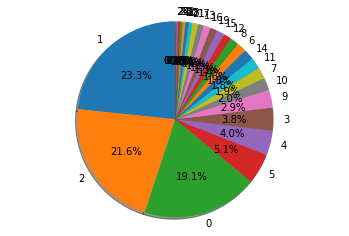

In [151]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(r.keys())
sizes = list(r)
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [123]:
pd.unique(df_style[df_style['reason_3']==3]['message'])

array(['Parentheses in are unnecessary and can be replaced with',
       "Parentheses in (!firstNumber && input[i]=='-') are unnecessary and can be replaced with",
       "Parentheses in (cardNumber[] != ' ' && cardNumber[] != ' ' && cardNumber[] != ' ') are unnecessary and can be replaced with",
       "Parentheses in (input[i] != ' ') are unnecessary and can be replaced with",
       "Parentheses in (cardNumber[] == ' ') are unnecessary and can be replaced with",
       "Parentheses in && cardNumber[i] == ' ') are unnecessary and can be replaced with",
       "Parentheses in ('+') are unnecessary and can be replaced with"],
      dtype=object)

In [120]:
pd.unique(df_style[df_style['reason_3']==2]['text'])

array(['Unexpected indentation (3) (it should be 4)',
       'Unexpected indentation (5) (it should be 4)',
       'Unexpected indentation (2) (it should be 4)',
       'Unexpected indentation (1) (it should be 4)',
       'Unexpected indentation (11) (it should be 4)',
       'Unexpected indentation (3) (it should be 5)',
       'Unexpected indentation (4) (it should be 7)',
       'Unexpected indentation (7) (it should be 4)',
       'Unexpected indentation (6) (it should be 4)',
       'Unexpected indentation (4) (it should be 5)',
       'Unexpected indentation (9) (it should be 4)',
       'Unexpected indentation (6) (it should be 8)',
       'Unexpected indentation (5) (it should be 8)',
       'Unexpected indentation (7) (it should be 8)',
       'Unexpected indentation (8) (it should be 6)',
       'Unexpected indentation (8) (it should be 7)',
       'Unexpected indentation (11) (it should be 12)',
       'Unexpected indentation (10) (it should be 4)',
       'Unexpected inden

In [136]:
pd.unique(df_style[df_style['reason']==10]['text'])

array(['Using the forEach method on ranges has a heavy performance cost. Prefer using simple for loops.',
       'This empty block of code can be removed.',
       "The import 'kotlin.concurrent.thread' is unused.",
       'Unexpected space after "}"',
       "The import 'kotlin.math.round' is unused.",
       "The import 'kotlin.math.abs' is unused.",
       "The import 'java.util.Scanner' is unused.",
       'Imports must be ordered in lexicographic order without any empty lines in-between',
       'java.lang.Math.* is a wildcard import. Replace it with fully qualified imports.',
       "The import 'kotlin.math.roundToInt' is unused.",
       "The import 'java.lang.StrictMath.abs' is unused.",
       'kotlin.math.* is a wildcard import. Replace it with fully qualified imports.',
       'let expression can be omitted',
       'Function main is nested too deeply.',
       "The import 'kotlin.math.ceil' is unused.",
       "The import 'kotlin.collections.ArrayList' is unused.",
       "

In [137]:
pd.unique(df_style[df_style['reason_3']==6]['text'])

array(['Using the forEach method on ranges has a heavy performance cost. Prefer using simple for loops.',
       'This empty block of code can be removed.',
       "The import 'kotlin.concurrent.thread' is unused.",
       'Unexpected space after "}"',
       "The import 'kotlin.math.round' is unused.",
       "The import 'kotlin.math.abs' is unused.",
       "The import 'java.util.Scanner' is unused.",
       'Imports must be ordered in lexicographic order without any empty lines in-between',
       'java.lang.Math.* is a wildcard import. Replace it with fully qualified imports.',
       "The import 'kotlin.math.roundToInt' is unused.",
       "The import 'java.lang.StrictMath.abs' is unused.",
       'kotlin.math.* is a wildcard import. Replace it with fully qualified imports.',
       'let expression can be omitted',
       'Function main is nested too deeply.',
       "The import 'kotlin.math.ceil' is unused.",
       "The import 'kotlin.collections.ArrayList' is unused.",
       "

In [127]:
pd.unique(df_style[df_style['reason']==14]['text'])

array(['Using the forEach method on ranges has a heavy performance cost. Prefer using simple for loops.',
       'This empty block of code can be removed.',
       "The import 'kotlin.concurrent.thread' is unused.",
       "The import 'kotlin.math.round' is unused.",
       "The import 'kotlin.math.abs' is unused.",
       "The import 'java.util.Scanner' is unused.",
       'Imports must be ordered in lexicographic order without any empty lines in-between',
       'java.lang.Math.* is a wildcard import. Replace it with fully qualified imports.',
       "The import 'kotlin.math.roundToInt' is unused.",
       "The import 'java.lang.StrictMath.abs' is unused.",
       'kotlin.math.* is a wildcard import. Replace it with fully qualified imports.',
       'let expression can be omitted',
       'Function main is nested too deeply.',
       "The import 'kotlin.math.ceil' is unused.",
       "The import 'kotlin.collections.ArrayList' is unused.",
       "The import 'java.lang.Math.PI' is unu

In [95]:
classter_name = {}
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    name = ""
    for ind in order_centroids[i, :5]:
        name += terms[ind] + " "
    classter_name[i] = name.strip()    
classter_name   

{0: 'match match pattern names match pattern names match pattern',
 1: 'missing spacing spacing missing variable val line detected',
 2: 'expression contains magic expression contains contains magic contains magic number magic number',
 3: 'indentation unexpected indentation unexpected variable val line detected',
 4: 'detected class expression literal order',
 5: 'variable val val variable line detected functionality holds',
 6: 'unexpected spacing unexpected spacing variable val line detected',
 7: 'semicolon unnecessary semicolon unnecessary variable val line detected',
 8: 'unnecessary replaced replaced parentheses unnecessary replaced parentheses unnecessary parentheses',
 9: 'needless blank blank line needless blank line needless blank',
 10: 'missing space missing space // space // // space',
 11: 'holds defines functionality functionality holds data functionality holds functionality',
 12: 'does braces does multi-line braces statement does',
 13: 'missing newline newline missin

In [135]:
df_style.pivot_table(values='sub_id', index = 'reason', \
                     columns= 'reason_3', aggfunc= 'count', fill_value=0)

reason_3,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
reason,,,,,,,,,,,,,,,,,,,,,
0,0,0,210831,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,228017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,186308,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,28656,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,39268,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,49498,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,37268,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
